=== Dummy Classifier (baseline) ===
              precision    recall  f1-score   support

           0       0.95      1.00      0.98    171388
           1       0.00      0.00      0.00      8612

    accuracy                           0.95    180000
   macro avg       0.48      0.50      0.49    180000
weighted avg       0.91      0.95      0.93    180000



C:\Users\Danie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Danie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Danie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
 [[171388      0]
 [  8612      0]]

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    171388
           1       1.00      1.00      1.00      8612

    accuracy                           1.00    180000
   macro avg       1.00      1.00      1.00    180000
weighted avg       1.00      1.00      1.00    180000

Confusion Matrix:
 [[171388      0]
 [     0   8612]]

=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    171388
           1       1.00      1.00      1.00      8612

    accuracy                           1.00    180000
   macro avg       1.00      1.00      1.00    180000
weighted avg       1.00      1.00      1.00    180000

Confusion Matrix:
 [[171388      0]
 [     0   8612]]


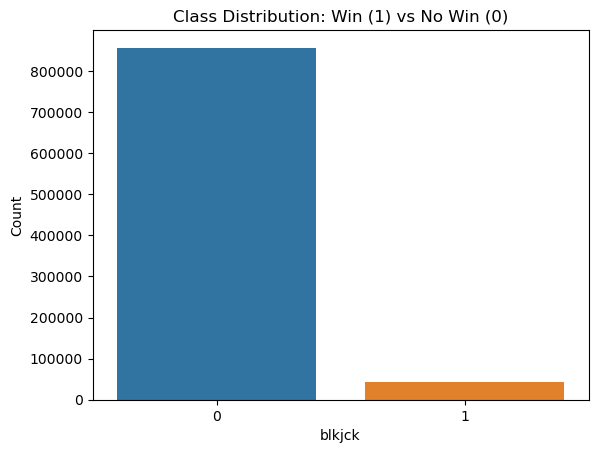

In [5]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv("BLK.csv")

# Step 2: Clean the target column ('blkjck') which contains 'Win' and 'NoWin'
df["blkjck"] = df["blkjck"].astype(str).str.strip().str.lower()

# Step 3: Filter valid values only
valid = df["blkjck"].isin(["win", "nowin"])
df = df[valid].copy()

# Step 4: Convert 'win' to 1 and 'nowin' to 0
df["blkjck"] = df["blkjck"].map({"win": 1, "nowin": 0})

# Step 5: Select relevant features and target
# We EXCLUDE 'ply2cardsum' to test for overfitting
features = ["card1", "card2", "dealcard1"]
X = df[features]
y = df["blkjck"]

# Step 6: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 7: Dummy Classifier (baseline)
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)

# Step 8: Logistic Regression
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Step 9: Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Step 10: Evaluation Results
print("=== Dummy Classifier (baseline) ===")
print(classification_report(y_test, y_pred_dummy))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dummy))

print("\n=== Logistic Regression ===")
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Step 11: Visualize class distribution
sns.countplot(x="blkjck", data=df)
plt.title("Class Distribution: Win (1) vs No Win (0)")
plt.xlabel("blkjck")
plt.ylabel("Count")
plt.show()

